In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Load the dataset
chickenpox_data = pd.read_csv('/content/gdrive/MyDrive/Data Preprocessing Datasets/hungary_chickenpox.csv')

**Data Preprocessing and Cleaning**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check for missing values
missing_values = chickenpox_data.isnull().sum()

In [ ]:
# Summary statistics
summary_stats = chickenpox_data.describe()

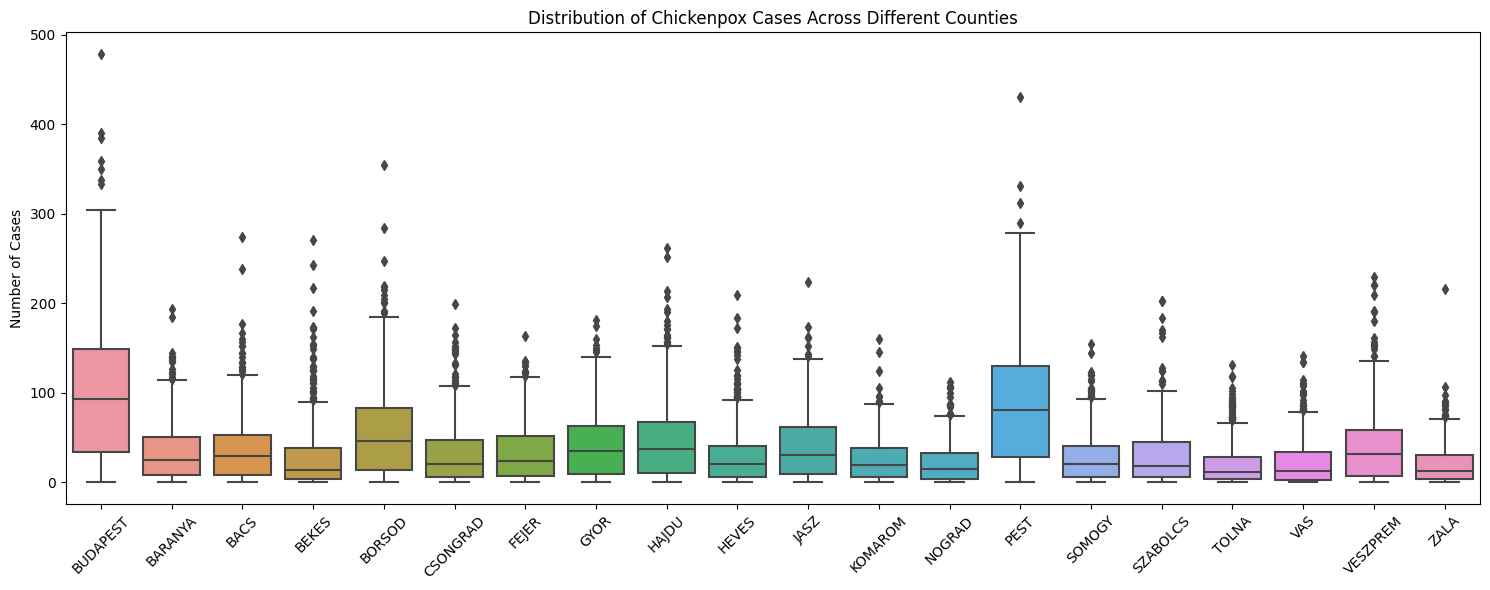

In [ ]:
# Visualization of the distribution of chickenpox cases across different counties (excluding the 'Date' column)
plt.figure(figsize=(15, 6))
sns.boxplot(data=chickenpox_data.drop(columns=["Date"]))
plt.title("Distribution of Chickenpox Cases Across Different Counties")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
missing_values, summary_stats.transpose()

(Date        0
 BUDAPEST    0
 BARANYA     0
 BACS        0
 BEKES       0
 BORSOD      0
 CSONGRAD    0
 FEJER       0
 GYOR        0
 HAJDU       0
 HEVES       0
 JASZ        0
 KOMAROM     0
 NOGRAD      0
 PEST        0
 SOMOGY      0
 SZABOLCS    0
 TOLNA       0
 VAS         0
 VESZPREM    0
 ZALA        0
 dtype: int64,
           count        mean        std  min    25%   50%     75%    max
 BUDAPEST  522.0  101.245211  76.354872  0.0  34.25  93.0  149.00  479.0
 BARANYA   522.0   34.204981  32.567222  0.0   8.00  25.0   51.00  194.0
 BACS      522.0   37.166667  36.843095  0.0   8.00  29.5   53.00  274.0
 BEKES     522.0   28.911877  37.618092  0.0   4.00  14.0   38.75  271.0
 BORSOD    522.0   57.082375  50.725437  0.0  14.25  46.5   83.75  355.0
 CSONGRAD  522.0   31.488506  33.790208  0.0   6.00  20.5   47.00  199.0
 FEJER     522.0   33.272031  31.397989  0.0   7.00  24.0   51.75  164.0
 GYOR      522.0   41.436782  36.014297  0.0   9.00  35.0   63.00  181.0
 HAJDU     52

**Clustering, Anomaly Elimination, Data Imputation, and Data Preparation**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop the 'Date' column and scale the data
scaled_data = StandardScaler().fit_transform(chickenpox_data.drop(columns=["Date"]))

In [ ]:
# Using the Elbow method to find the optimal number of clusters for KMeans
inertia = []
sil_scores = []
range_clusters = range(2, 10)

for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

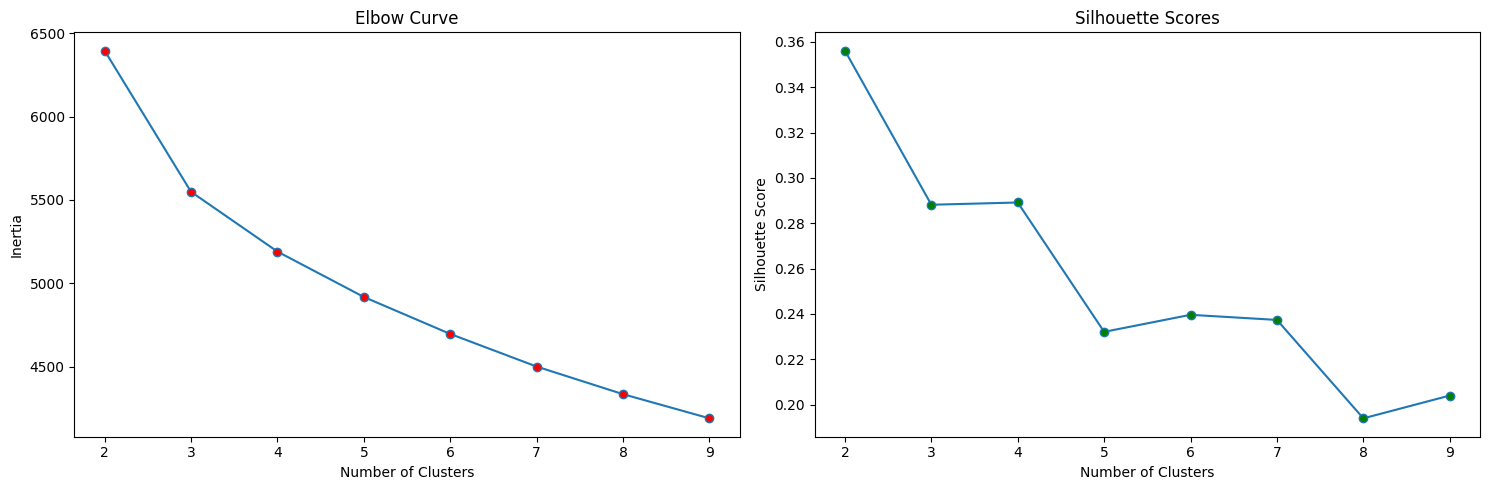

In [ ]:
# Plotting the Elbow curve and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(range_clusters, inertia, 'o-', markerfacecolor='red')
ax[0].set_title('Elbow Curve')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(range_clusters, sil_scores, 'o-', markerfacecolor='green')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
chickenpox_data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Using Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=0)
chickenpox_data['Anomaly'] = iso_forest.fit_predict(scaled_data)

In [ ]:
# Filter out the anomalies
filtered_data = chickenpox_data[chickenpox_data['Anomaly'] == 1].drop(columns=['Anomaly'])

In [ ]:
# Display the first few rows of the filtered data and the number of anomalies detected
filtered_data.head(), chickenpox_data['Anomaly'].value_counts()

(         Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
 1  10/01/2005       157       60    30     92     200        53     51    70   
 2  17/01/2005        96       44    31     86      93        30     93    84   
 3  24/01/2005       163       49    43    126      46        39     52   114   
 4  31/01/2005       122       78    53     87     103        34     95   131   
 6  14/02/2005       153      103    54    192     148        65    100   118   
 
    HAJDU  ...  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  VESZPREM  \
 1     84  ...       50      29   141      48        29     58   53        68   
 2    191  ...       46       4   157      33        33     24   18        62   
 3    107  ...       54      14   107      66        50     25   21        43   
 4    172  ...       49      11   124      63        56      7   47        85   
 6    129  ...       56      10   119     104        85     20   32       153   
 
    ZALA  Cluster  
 1  

In [ ]:
# Convert the 'Date' column to datetime format and extracting features
chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'])
chickenpox_data['Year'] = chickenpox_data['Date'].dt.year
chickenpox_data['Month'] = chickenpox_data['Date'].dt.month
chickenpox_data['Week'] = chickenpox_data['Date'].dt.week

<ipython-input-16-9bc31cf2aae1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'])
<ipython-input-16-9bc31cf2aae1>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  chickenpox_data['Week'] = chickenpox_data['Date'].dt.week


In [ ]:
# Drop the original 'Date' column
chickenpox_data.drop(columns=['Date'], inplace=True)

In [ ]:
import numpy as np

# Feature selection: Removing highly correlated features
correlation_matrix = chickenpox_data.corr()
upper_triangle = correlation_matrix.where(pd.DataFrame(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)))

<ipython-input-19-354b99fcd0b6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(pd.DataFrame(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)))


In [ ]:
# Finding columns with correlation greater than 0.95
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

In [ ]:
# Dropping correlated columns
filtered_data = chickenpox_data.drop(columns=to_drop)

**Build Various ML Models Using AutoML Including Ensemble Model**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = filtered_data.drop(columns=["BUDAPEST"])
y = filtered_data["BUDAPEST"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((417, 24), (105, 24))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0)
}

In [ ]:
# Train models, make predictions, and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

In [ ]:
results

{'Linear Regression': 28.597573586071682,
 'Decision Tree': 34.38095238095238,
 'Random Forest': 24.64533333333334,
 'Gradient Boosting': 27.38659149456006}